In [2]:
library(anndata)
library(scater)
library(Seurat)
library(cowplot)
library(reticulate)
# library(loomR)
library(monocle)
library(ggpubr)
library(CellChat)

In [3]:
ad <- import("anndata", convert = FALSE)
ad_object <- ad$read_h5ad("../data/v4-sub-fib.h5ad")
data.input <- t(py_to_r(ad_object$X))
rownames(data.input) <- rownames(py_to_r(ad_object$var))
colnames(data.input) <- rownames(py_to_r(ad_object$obs))
# access meta data
meta.data <- py_to_r(ad_object$obs)
meta <- meta.data


In [4]:
RA_matrix<-as.matrix(data.input)
feature_ann<-data.frame(gene_id=rownames(RA_matrix),gene_short_name=rownames(RA_matrix))
rownames(feature_ann)<-rownames(RA_matrix)
RA_fd<-new("AnnotatedDataFrame", data = feature_ann)
sample_ann<-meta
rownames(sample_ann)<-colnames(RA_matrix)
RA_pd<-new("AnnotatedDataFrame", data =sample_ann)
RA.cds<-newCellDataSet(as.matrix(RA_matrix),phenoData =RA_pd,featureData =RA_fd,expressionFamily=negbinomial.size())

Warning message in class(cellData) != "matrix" && isSparseMatrix(cellData) == FALSE:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [5]:
RA.cds <- estimateSizeFactors(RA.cds,)

In [6]:
RA.cds <- estimateDispersions(RA.cds)

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors.”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warni

In [7]:
RA.cds=detectGenes(RA.cds,min_expr = 0.1) #计算每个基因在多少细胞中表达

In [8]:
RA.cds=reduceDimension(RA.cds, max_components = 2,
    method = 'DDRTree')

Registered S3 methods overwritten by 'proxy':
  method               from    
  print.registry_field registry
  print.registry_entry registry



In [ ]:
RA.cds <- orderCells(RA.cds, reverse = F, )

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
“Argument `neimode' is deprecated; use `mode' instead”


In [ ]:

# draw the cell pseudo pic on leiden
plot_cell_trajectory(RA.cds,color_by = "leiden_poly")
ggsave(paste(dir, "leiden.pdf", sep=''),device = "pdf",units = c("cm"))
# draw the cell pseudo pic on state
plot_cell_trajectory(RA.cds,color_by = "State")
ggsave(paste(dir, "State.pdf", sep=''),device = "pdf",units = c("cm"))
# draw the pseudo pic change
plot_cell_trajectory(RA.cds,color_by = "Pseudotime")
ggsave(paste(dir,"Pseudotime.pdf", sep=''),device = "pdf",units = c("cm"))
# plot_cell_trajectory(RA.cds,color_by = "celltype")+facet_wrap(~celltype,nrow=1)
# ggsave("celltypeb.pdf",device = "pdf",width = 21,height = 9,units = c("cm"))
# draw the cell state along the time respectively
plot_cell_trajectory(RA.cds, color_by='State') + facet_wrap("~State", nrow=1)
ggsave(paste(dir, 'split_State.pdf', sep=''), device = 'pdf', units = c('cm'))

Saving 16.9 x 16.9 cm image



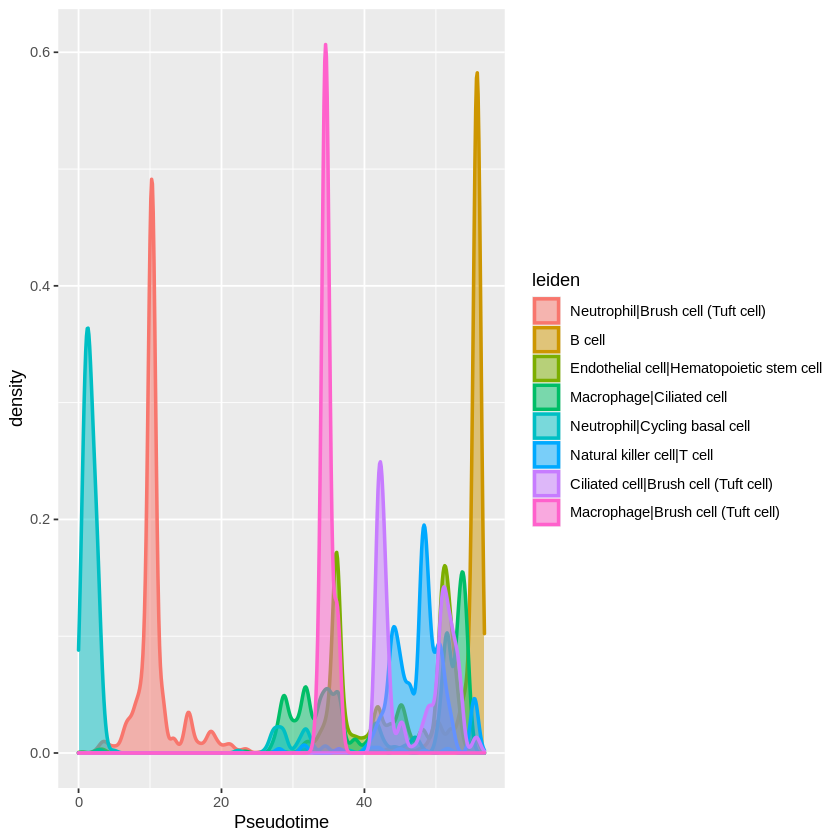

In [26]:
# draw cell density pic along the time
df <- pData(RA.cds) 
ggplot(df, aes(Pseudotime, color=leiden,fill=leiden)) + geom_density(bw=0.5, size=1,alpha=0.5) 
ggsave('density.pdf', device = 'pdf', units = c("cm"))

Saving 16.9 x 16.9 cm image



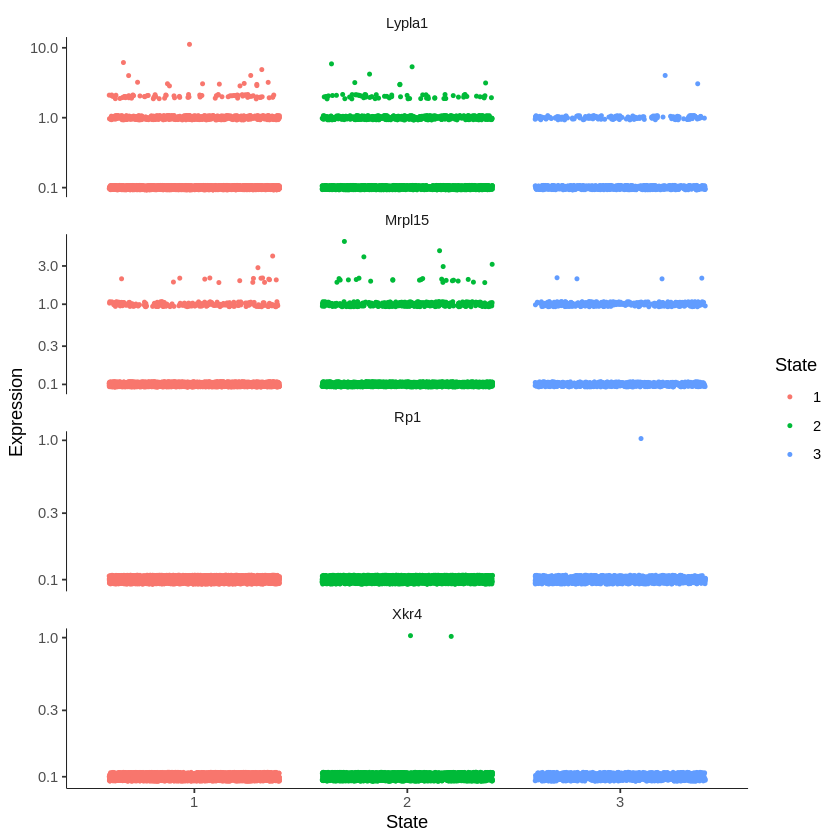

Saving 16.9 x 16.9 cm image



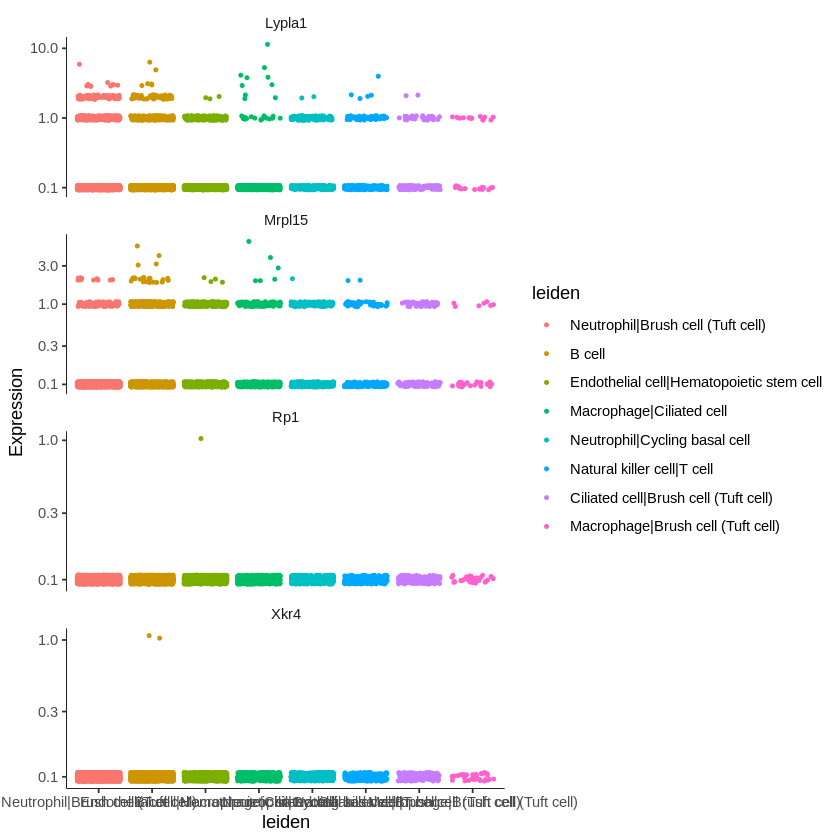

In [27]:
cg = head(RA.cds@featureData@data$gene_short_name,4)
plot_genes_jitter(RA.cds[cg,], grouping = "State", color_by = "State")
ggsave(paste(dir, "State_jitter_state.pdf", sep=''),device = "pdf",units = c("cm"))
plot_genes_jitter(RA.cds[cg,], grouping = "leiden", color_by = "leiden")
ggsave(paste(dir, "State_jitter_leiden.pdf", sep=''),device = "pdf",units = c("cm"))

Saving 16.9 x 16.9 cm image



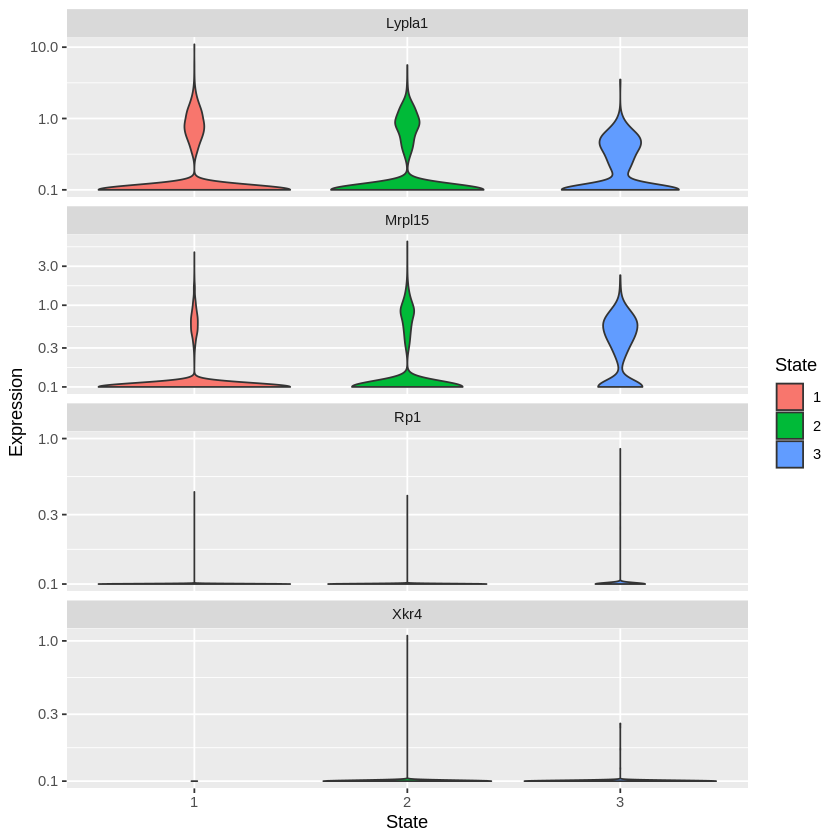

Saving 16.9 x 16.9 cm image



<simpleError in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon): NAs found in the working weights variable 'wz'>


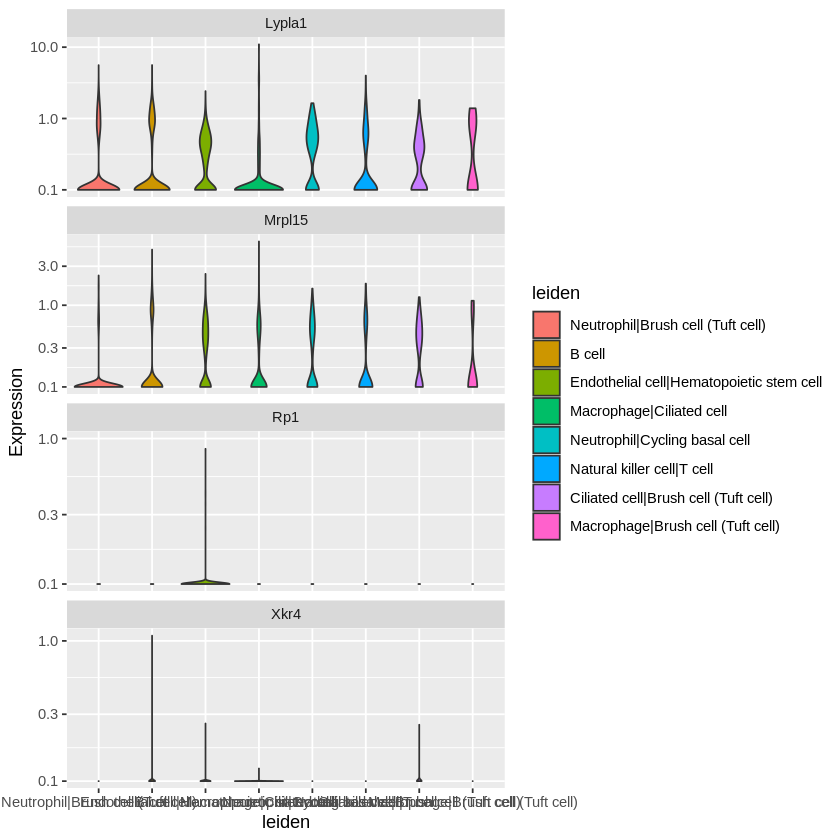

Saving 16.9 x 16.9 cm image



<simpleError in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon): NAs found in the working weights variable 'wz'>


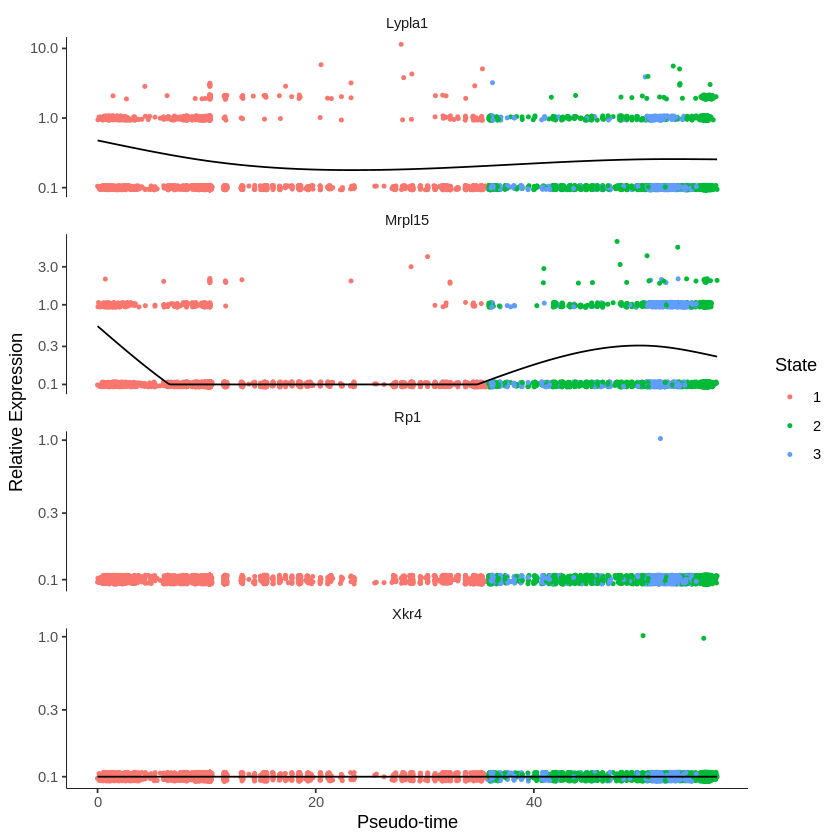

Saving 16.9 x 16.9 cm image



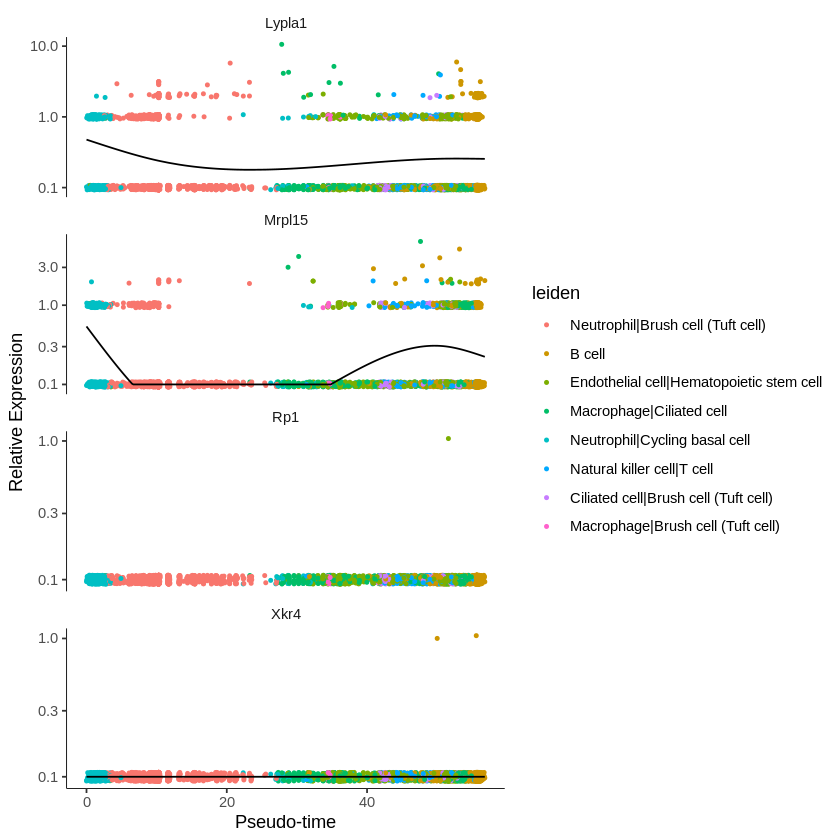

In [28]:
plot_genes_violin(RA.cds[cg,], grouping = "State", color_by = "State")
ggsave(paste(dir, "State_violin_state.pdf", sep=''),device = "pdf",units = c("cm"))
plot_genes_violin(RA.cds[cg,], grouping = "leiden", color_by = "leiden")
ggsave(paste(dir, "State_violin_leiden.pdf", sep=''),device = "pdf",units = c("cm"))

plot_genes_in_pseudotime(RA.cds[cg,], color_by = "State")
ggsave(paste(dir, "Stat_pseudo_state.pdf", sep=''),device = "pdf",units = c("cm"))
plot_genes_in_pseudotime(RA.cds[cg,], color_by = "leiden")
ggsave(paste(dir, "Stat_pseudo_leiden.pdf", sep=''),device = "pdf",units = c("cm"))